In [148]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import datetime
sns.set_style("dark")


from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, RandomizedSearchCV, KFold, cross_validate, train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline

## Load Data

In [149]:
df = pd.read_csv('bmw.csv')

train, test = train_test_split(df, test_size=0.3, random_state=2020)

print('train shape: {}'.format(train.shape))
print('test shape: {}'.format(test.shape))

train.sample(n=5)

train shape: (7546, 9)
test shape: (3235, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1451,X2,2019,22790,Automatic,8477,Diesel,145,49.6,2.0
3203,4 Series,2019,23480,Semi-Auto,7107,Petrol,150,48.7,2.0
9302,X3,2013,10795,Automatic,94853,Diesel,160,50.4,2.0
4579,X1,2020,29995,Semi-Auto,1501,Diesel,145,50.4,2.0
8025,1 Series,2016,11800,Manual,43334,Diesel,30,65.7,2.0


In [150]:
### Train test split digunakan untuk membagi data menjadi data terlatih dan data test. data train digunakan untuk menerapkan suatu model machine learning. dan data test digunakan untuk mengevaluasi hasil model machine learning yg akan digunakan selanjutnya

In [151]:
train['model'].unique()

array([' 2 Series', ' 3 Series', ' X1', ' 5 Series', ' X5', ' 7 Series',
       ' 4 Series', ' 1 Series', ' X3', ' 6 Series', ' X2', ' M4', ' X6',
       ' M5', ' M2', ' X4', ' i3', ' M3', ' X7', ' Z4', ' 8 Series',
       ' i8', ' M6', ' Z3'], dtype=object)

In [152]:
# remove space before model name
train['model'] = train['model'].apply(lambda x: x.strip())
train['model'].unique()

array(['2 Series', '3 Series', 'X1', '5 Series', 'X5', '7 Series',
       '4 Series', '1 Series', 'X3', '6 Series', 'X2', 'M4', 'X6', 'M5',
       'M2', 'X4', 'i3', 'M3', 'X7', 'Z4', '8 Series', 'i8', 'M6', 'Z3'],
      dtype=object)

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 4613 to 9056
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         7546 non-null   object 
 1   year          7546 non-null   int64  
 2   price         7546 non-null   int64  
 3   transmission  7546 non-null   object 
 4   mileage       7546 non-null   int64  
 5   fuelType      7546 non-null   object 
 6   tax           7546 non-null   int64  
 7   mpg           7546 non-null   float64
 8   engineSize    7546 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 589.5+ KB


In [154]:
train.apply(lambda x: x.nunique(), axis=0)

model             24
year              24
price           2997
transmission       3
mileage         5826
fuelType           5
tax               36
mpg               98
engineSize        17
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [156]:
# dataset bmw memiliki 9 column, 10781 data yang nantinya akan dibagi menjadi data_train dan data_test dengan rasio 70:30 dimana datanya tidak memiliki missing value

## Exporatory Data Analysis

In [157]:
def plot_(df, col, y='price'):
            
    fig, ax = plt.subplots(1,2,figsize=(20,5))
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90) 
    fig.suptitle(str(col) + ' vs price')
    

    if df[col].dtypes == 'object':
        sns.boxplot(data=df, x=col, y= y, ax=ax[0])
        sns.countplot(df[col], ax=ax[1])
        
        
    elif len(df[col].unique()) <= 10:
        sns.swarmplot(data=df, x=col, y= y, ax=ax[0])
        sns.countplot(df[col], ax=ax[1])
        
    else:
#         sns.scatterplot(data=df, x=col, y= y, ax=ax[0])
        sns.regplot(data=df, x=col, y= y, order=2, ax=ax[0])
        sns.distplot(df[col], kde=False,fit=norm, ax=ax[1])

print('SET FUNCTION COMPLETED!')

SET FUNCTION COMPLETED!


In [158]:
# Get numerical columns
num_col = [col for col in train.columns if train[col].dtype != 'object']
print('Numerical Columns\n'+ str(num_col))

# Get categorical columns
cat_col = [col for col in train.columns if train[col].dtype == 'object']
print('\nCategorical Columns\n'+ str(cat_col))

Numerical Columns
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']

Categorical Columns
['model', 'transmission', 'fuelType']


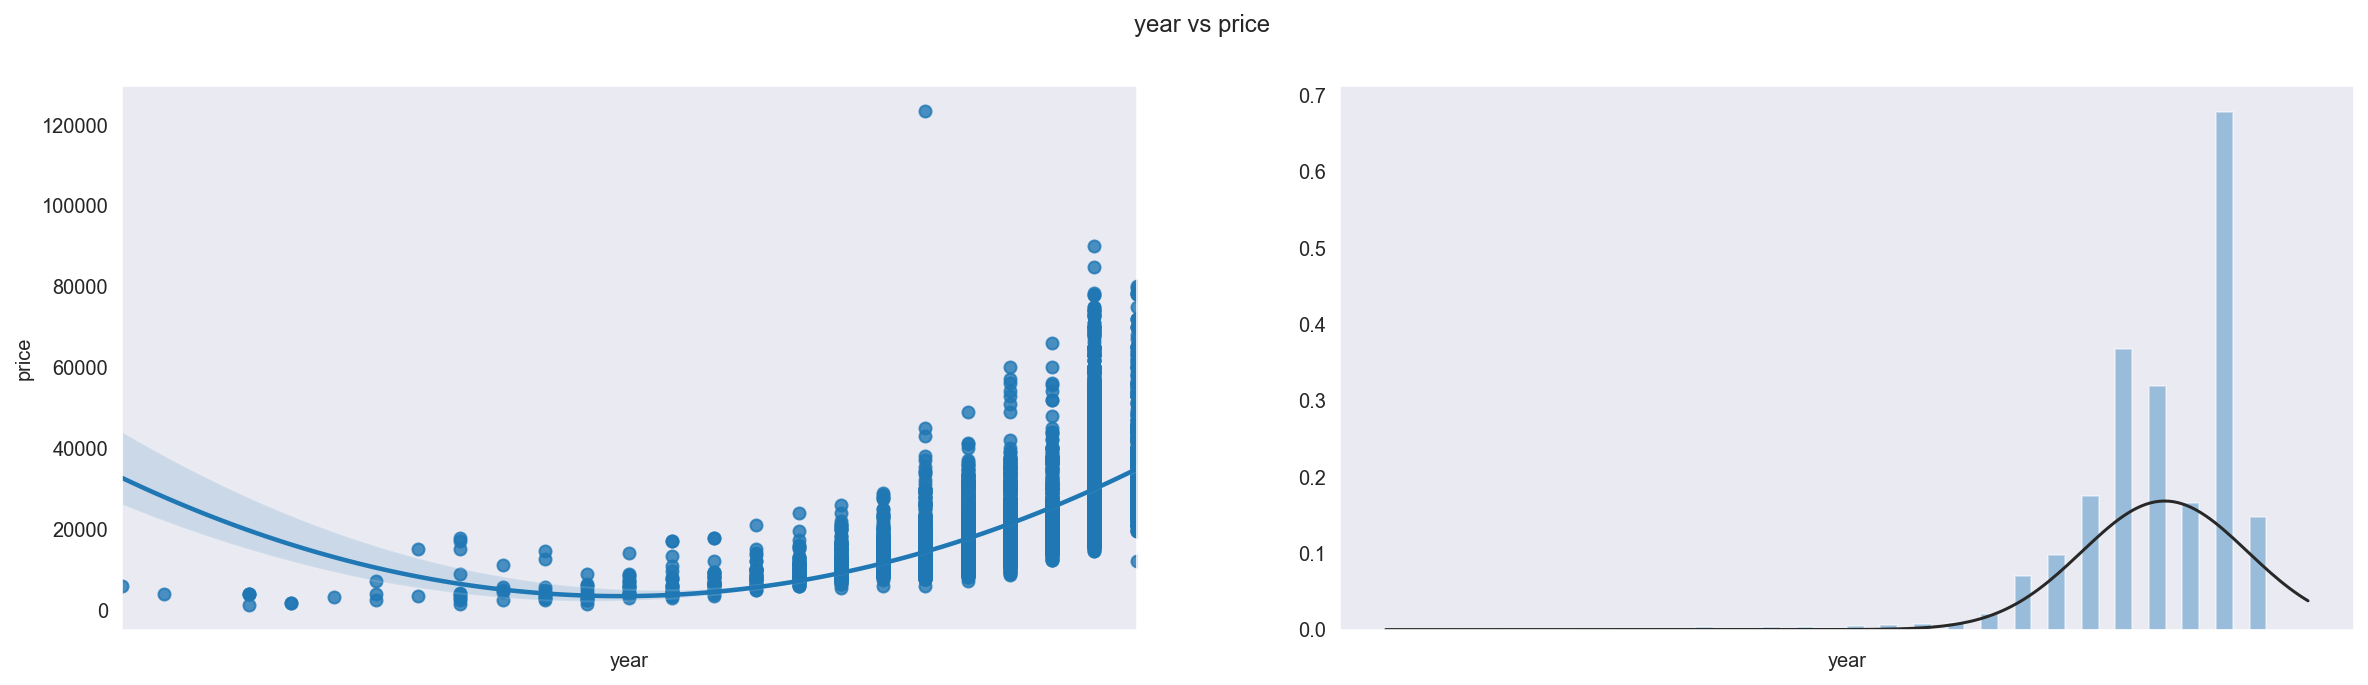

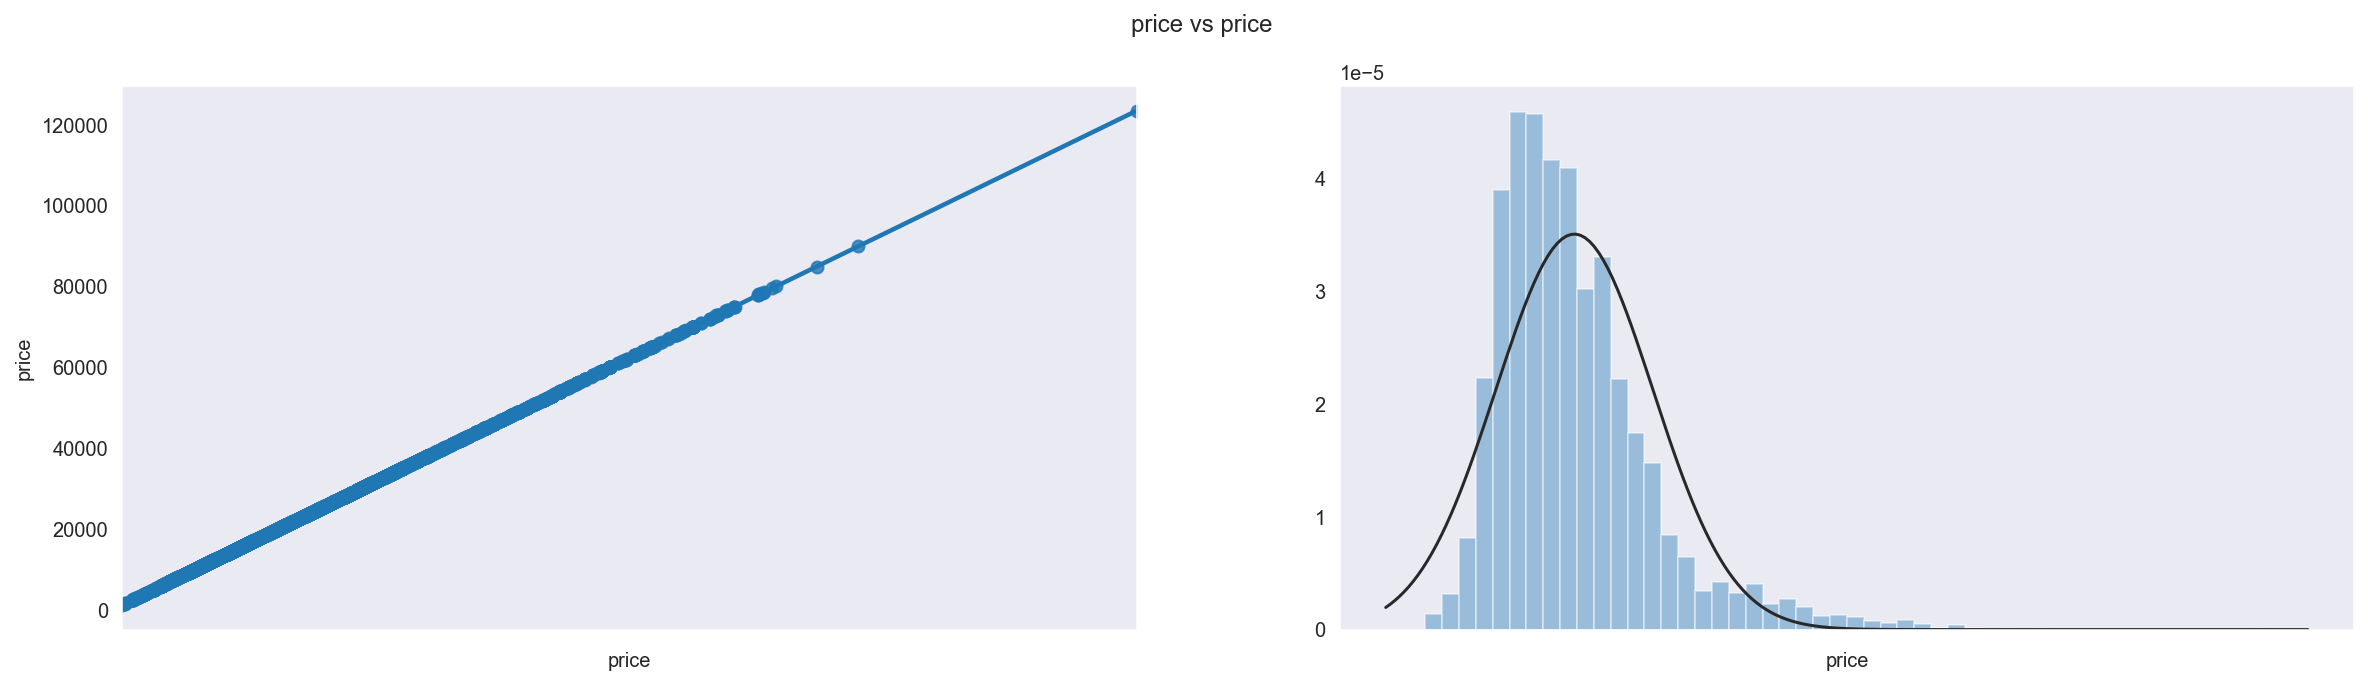

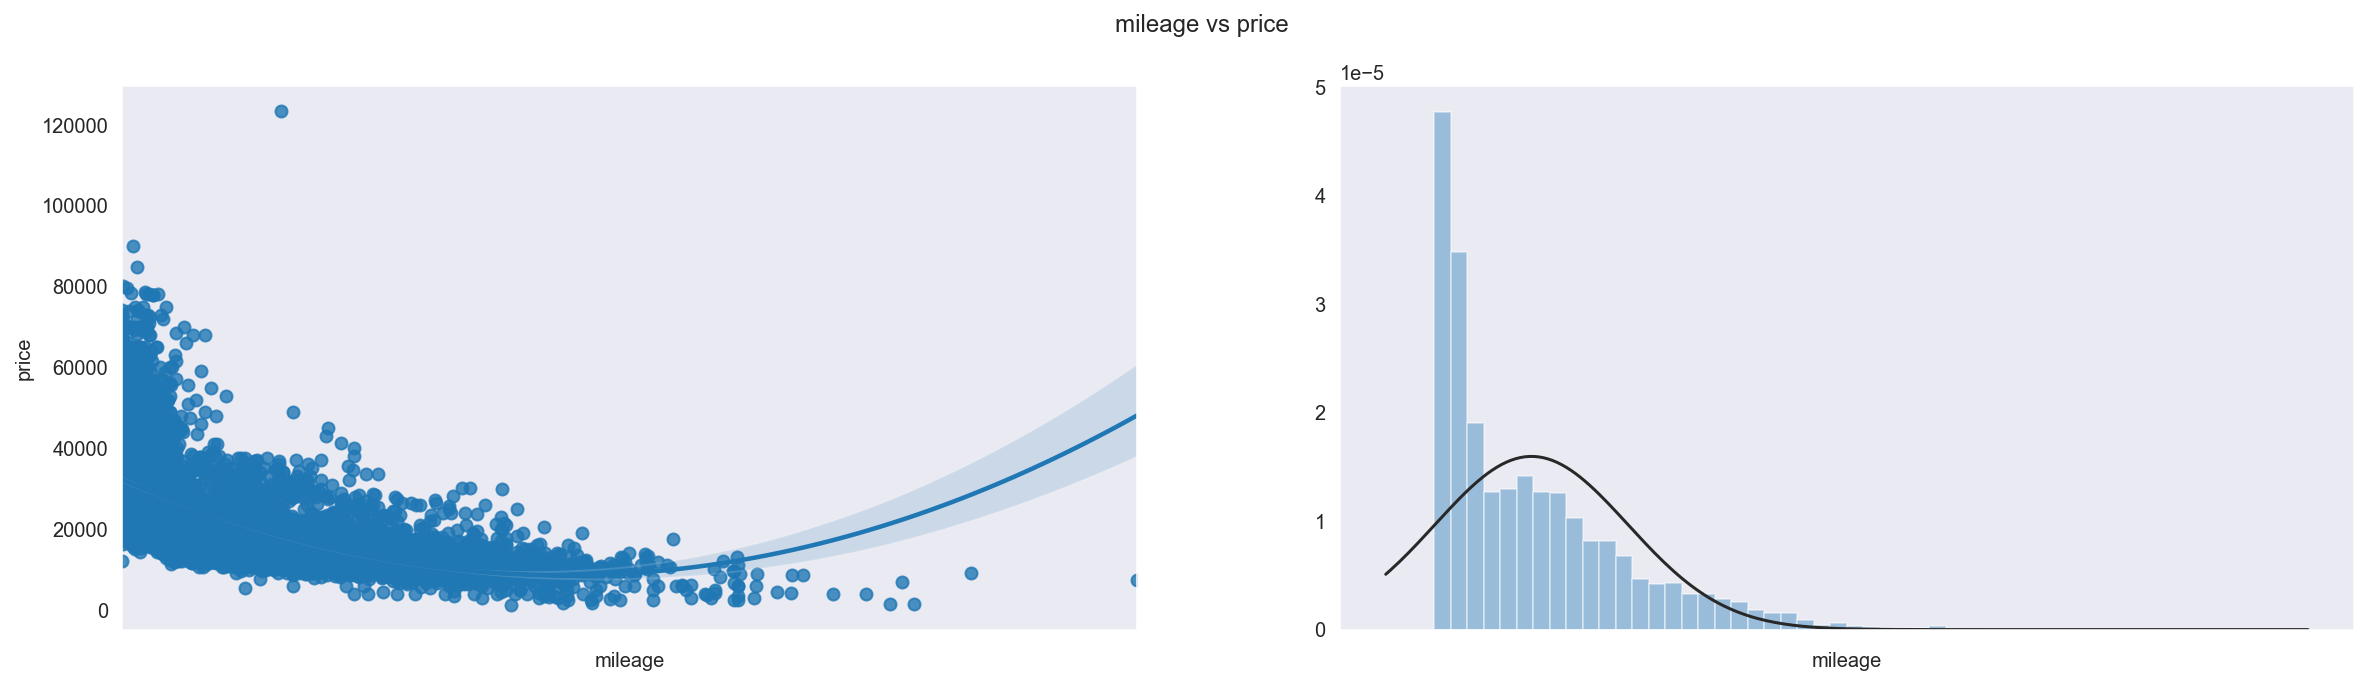

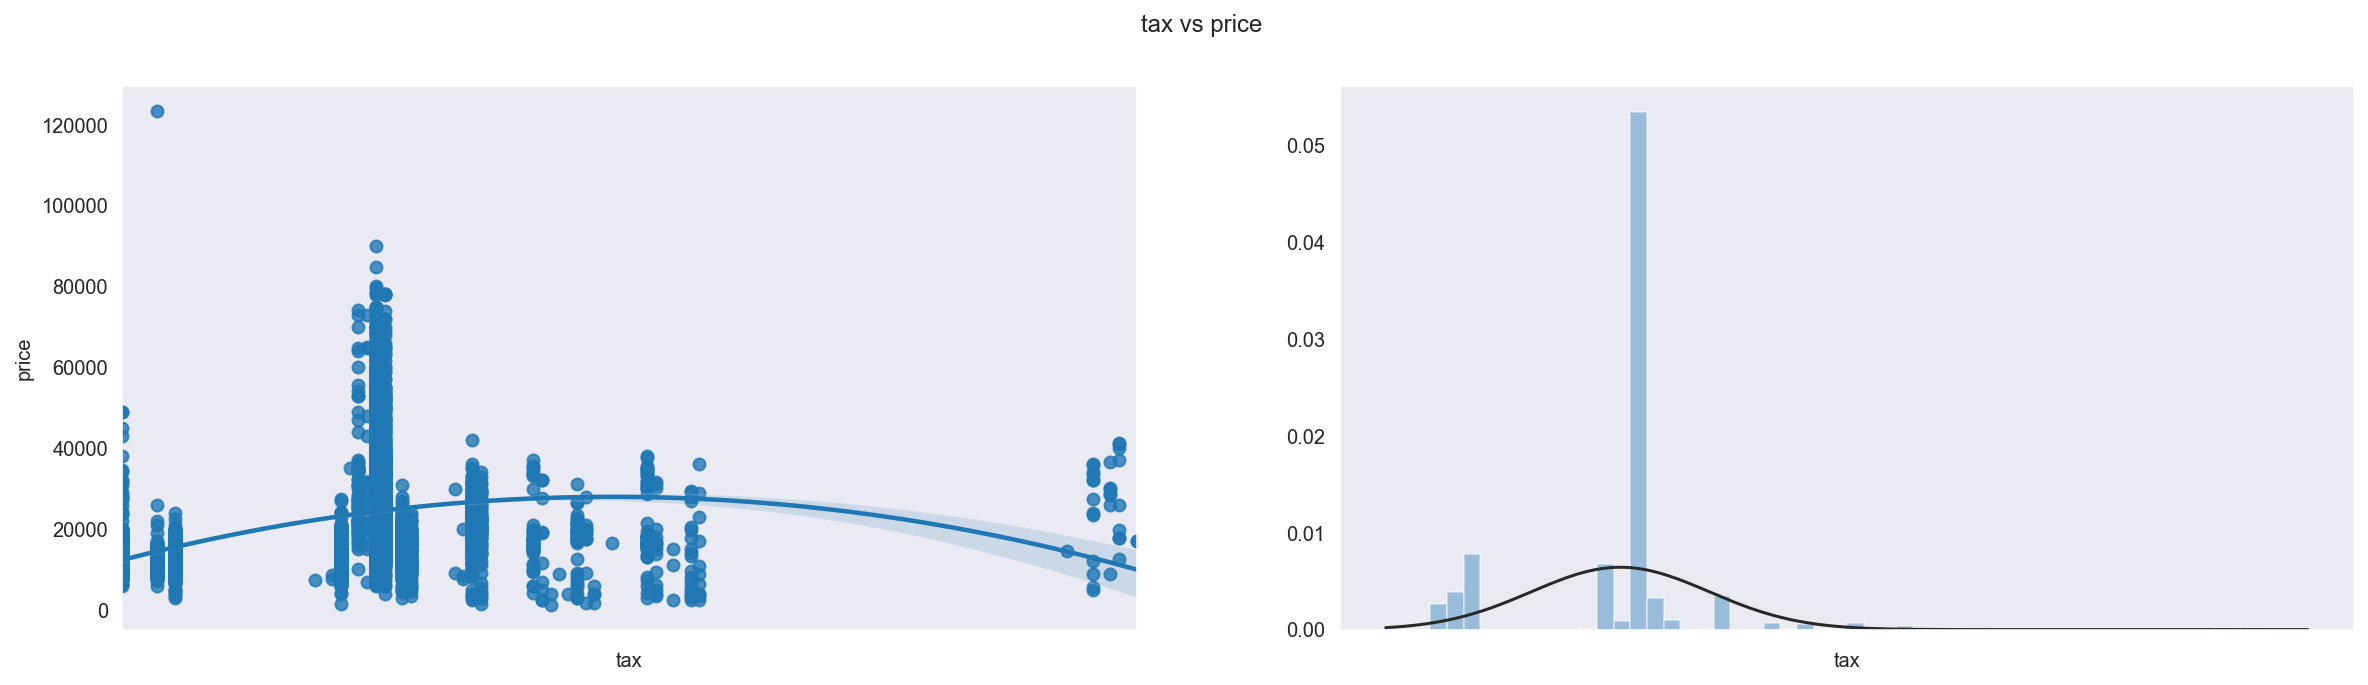

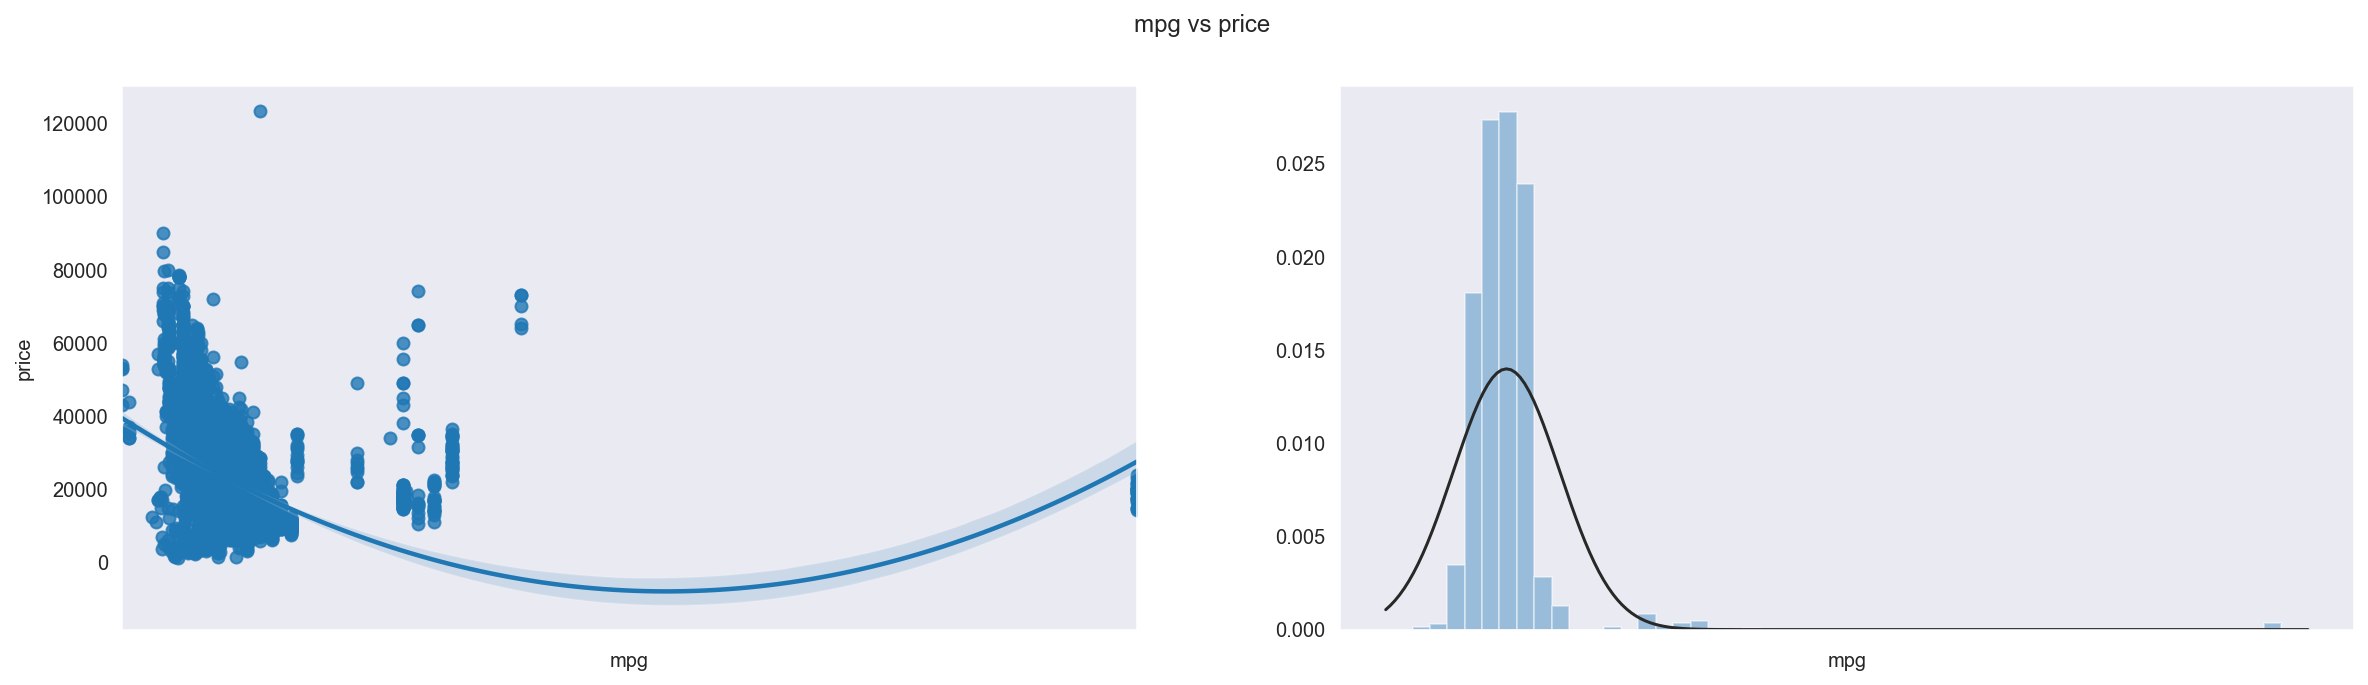

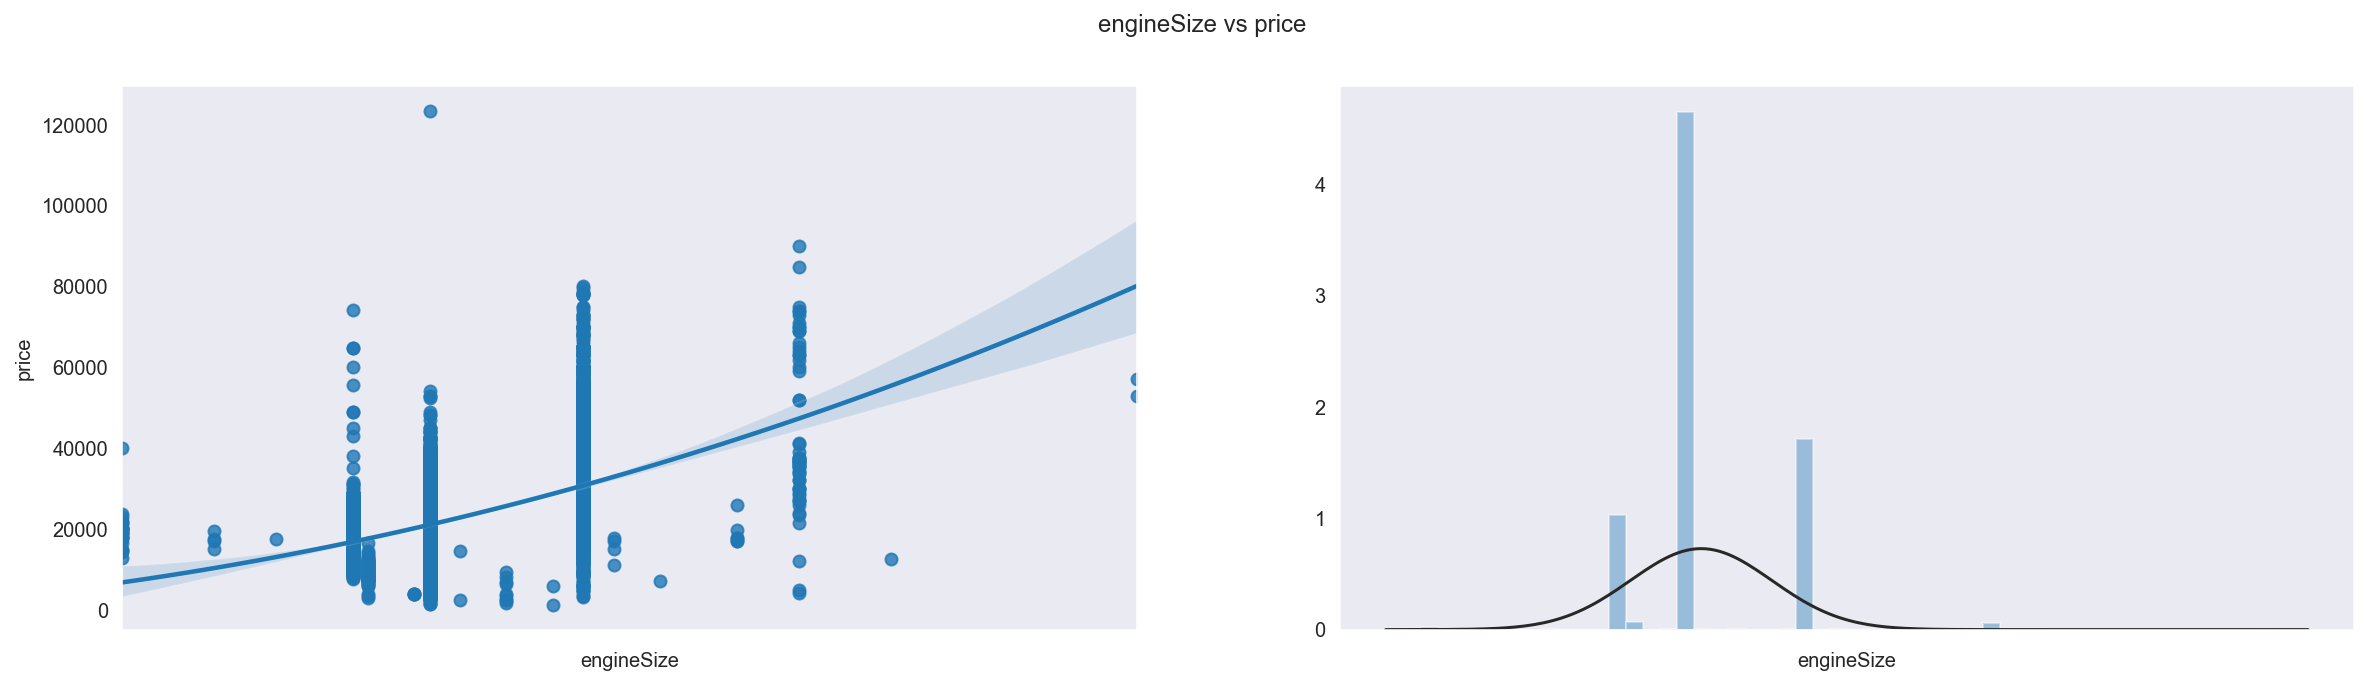

In [159]:
for col in num_col:
    plot_(train, col)

Beberapa outlier akan mengurangi performa model yang akan digunakan, jadi untuk itu outlier akan dihilangkan dari model nanti.

### Numerical features

Cek Korelasi antar data

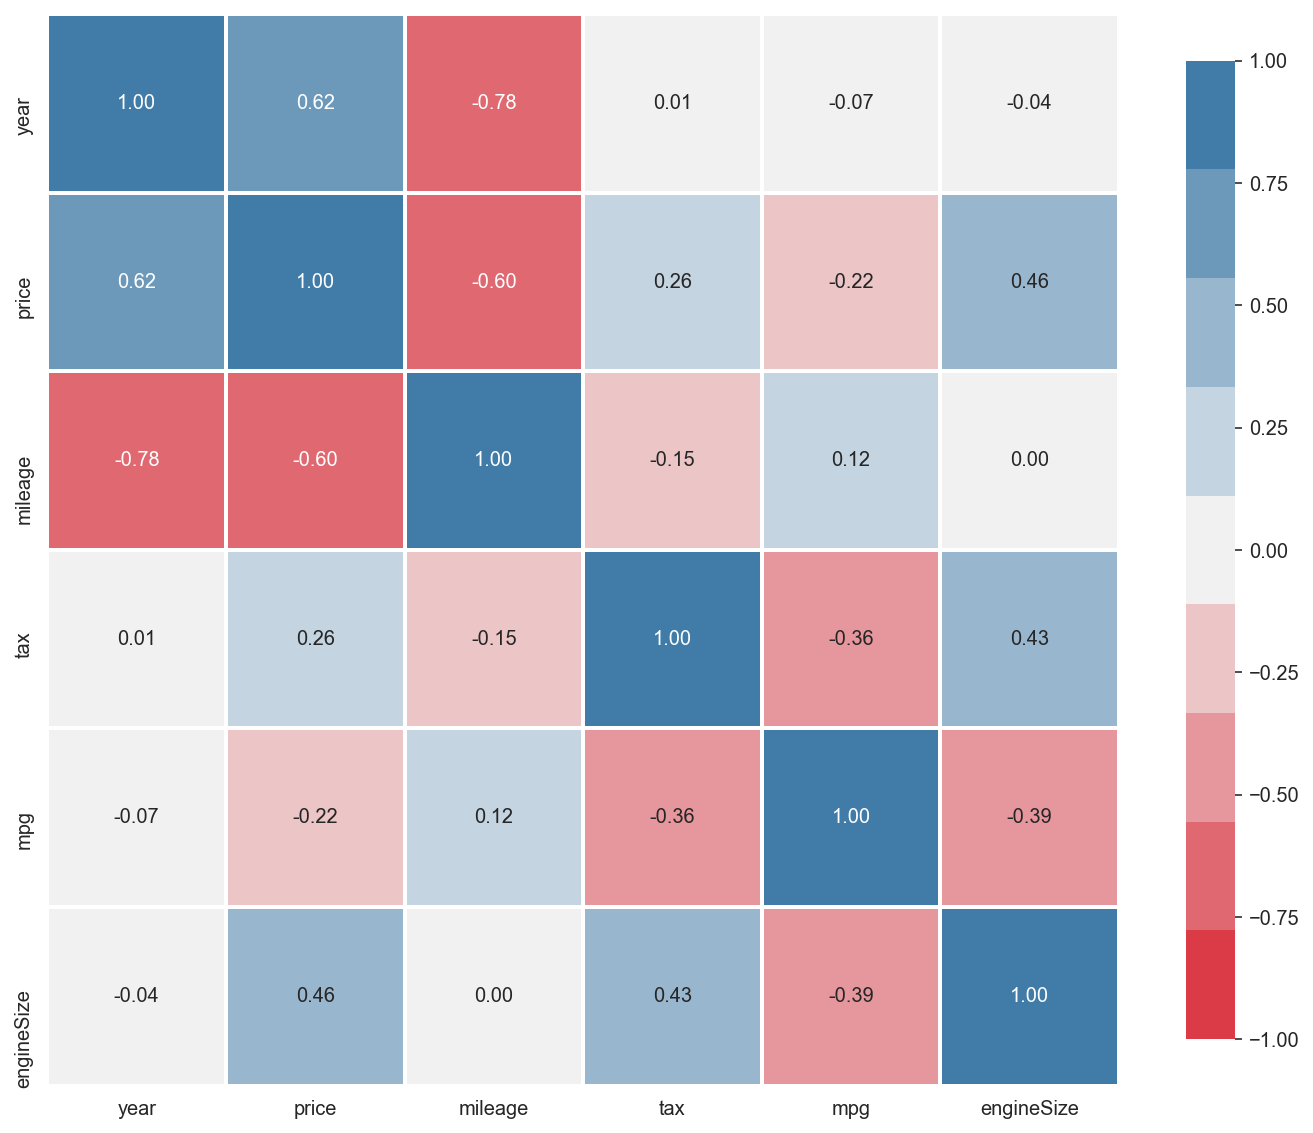

In [160]:
fig, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(10, 240, n=9)

# Plot heat map
train_corr = train.corr()
sns.heatmap(train_corr, annot=True, fmt=".2f", 
           linewidths=2, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .9}, square=True)

#### dari tabel diatas, didapatkan korelasi tertinggi ada pada kolom year dan mileage (correlation > 0.5)
- Jika harga mobil baru akan lebih tinggi dibanding mobil tua, alasan itu cukup logis (positive correlation)
- mileage yang lebihi tinggi yang artinya mobil sudah dipakai nantinya akan berdampak harganya yang jatuh (negative correlation)

    mpg dan tax tidak berkorelasi secara signifikan terhadap harga

### Category features

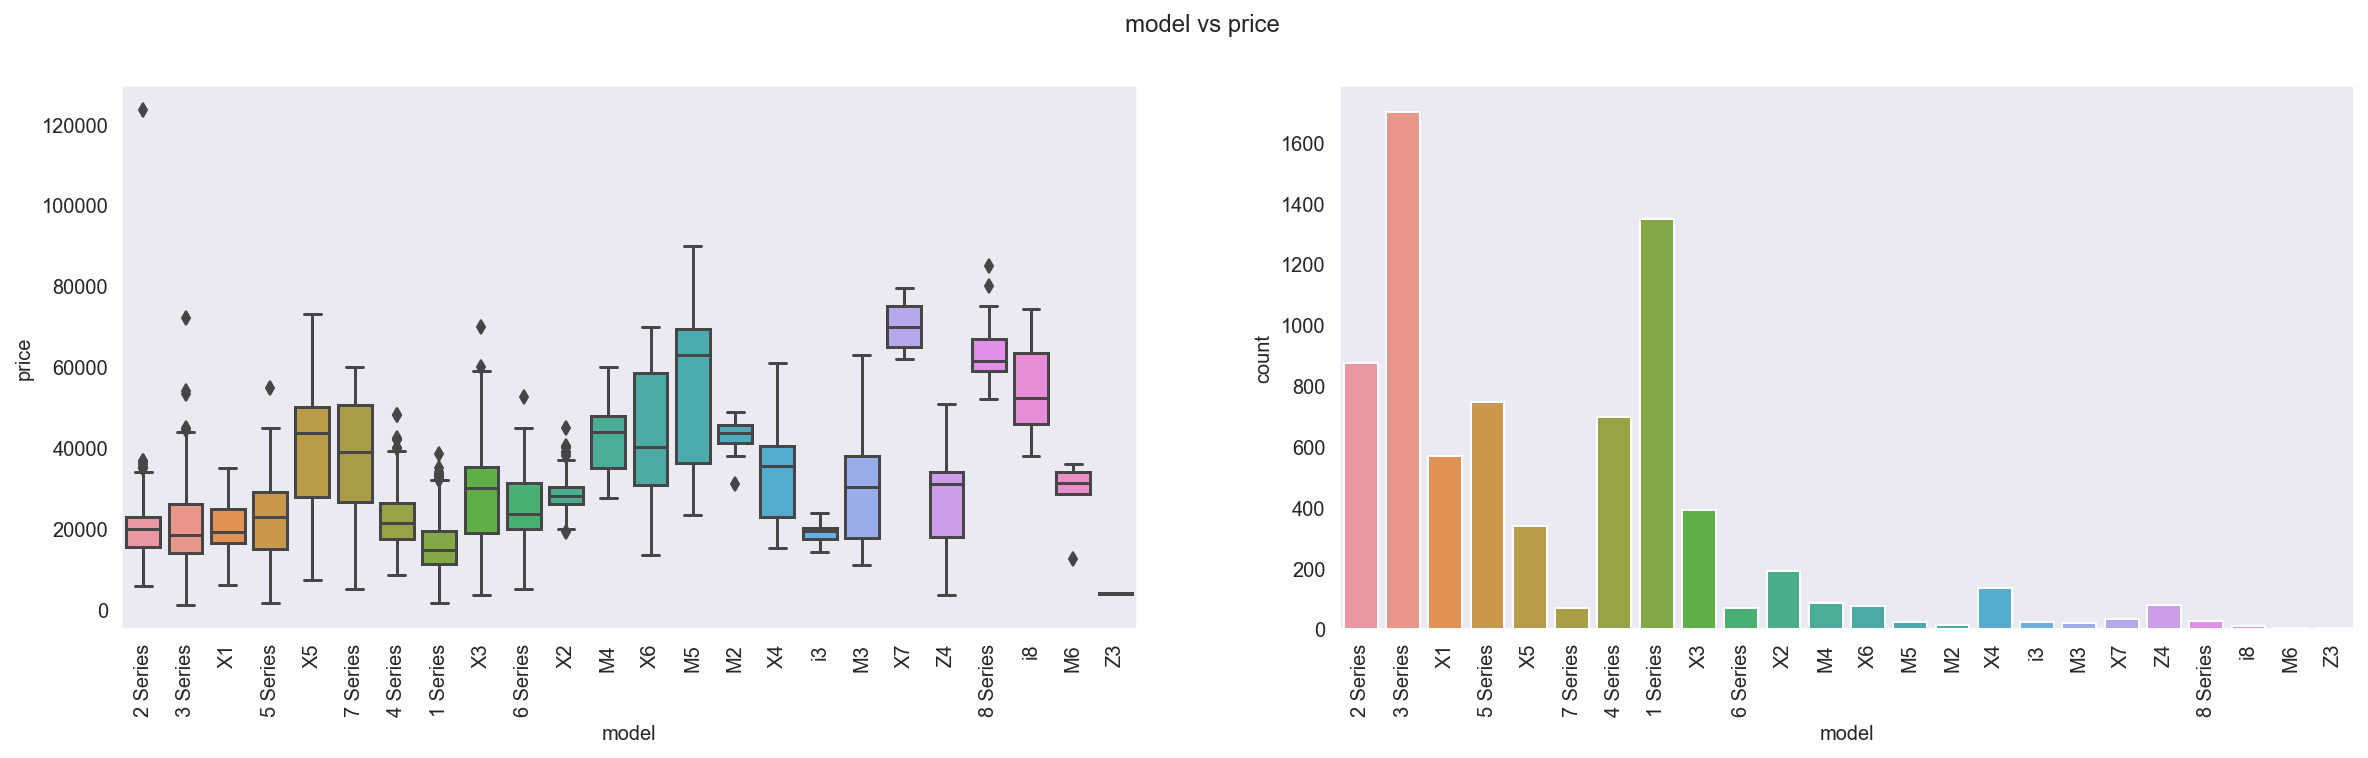

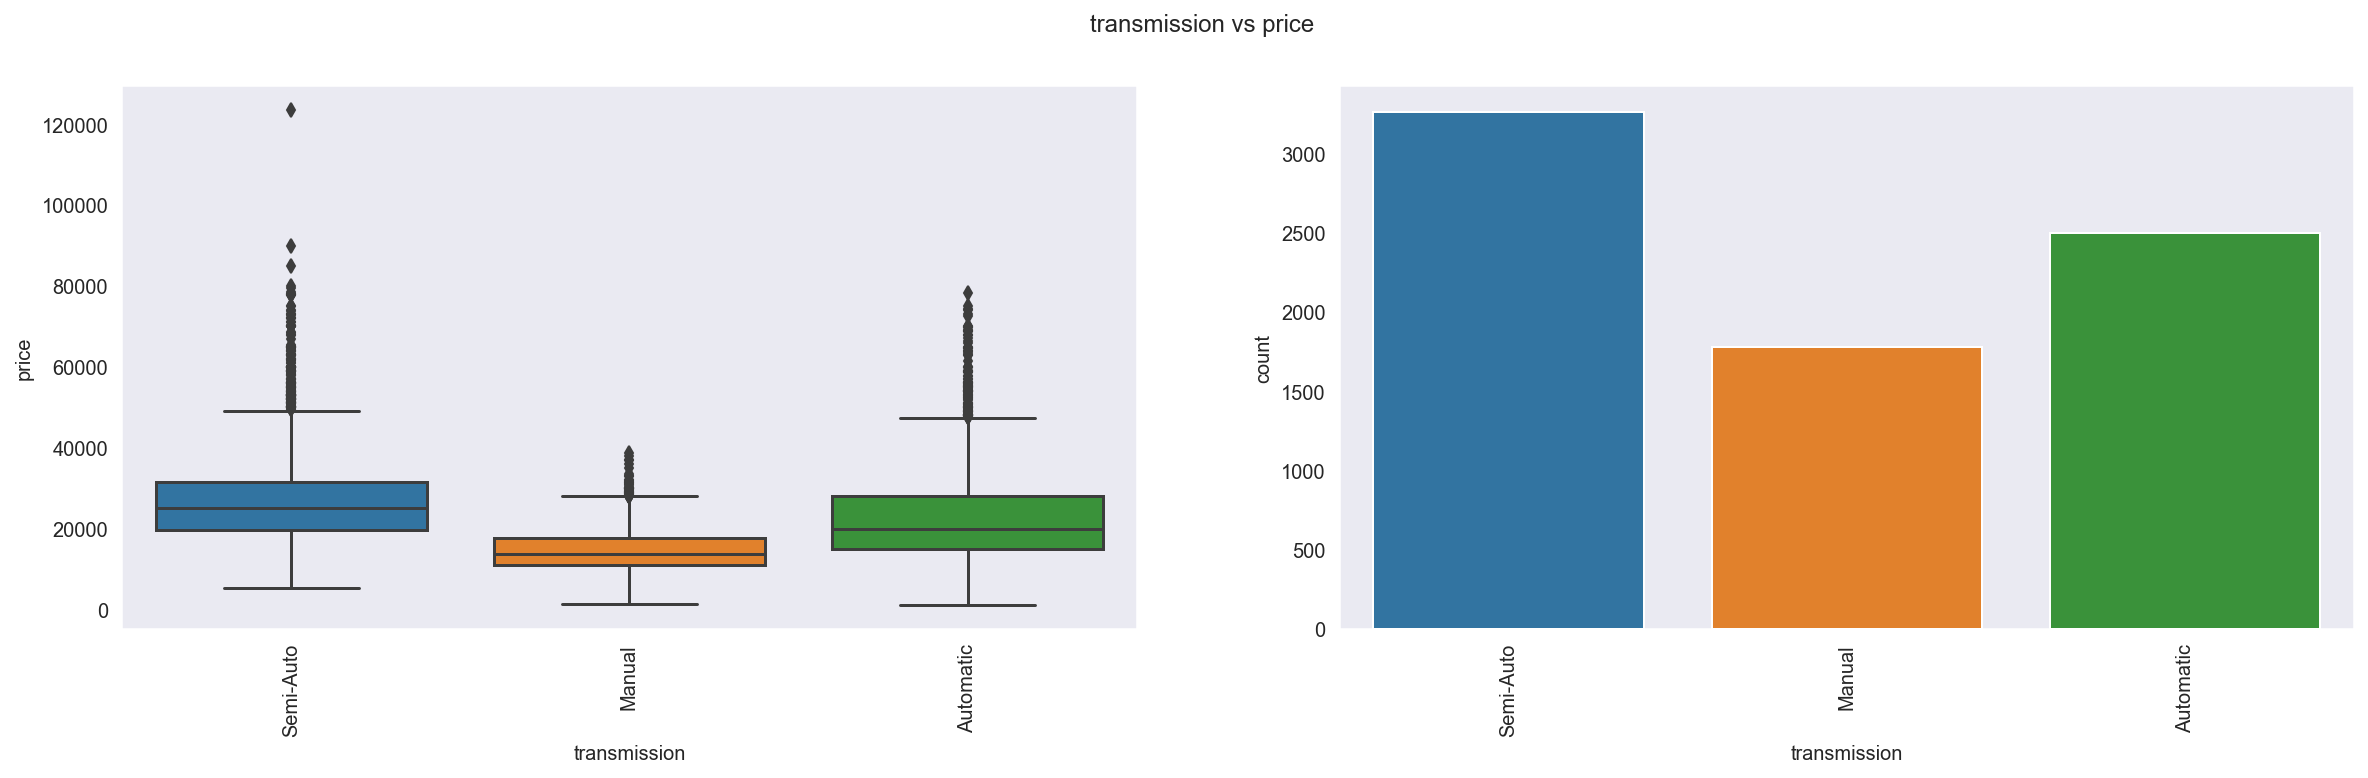

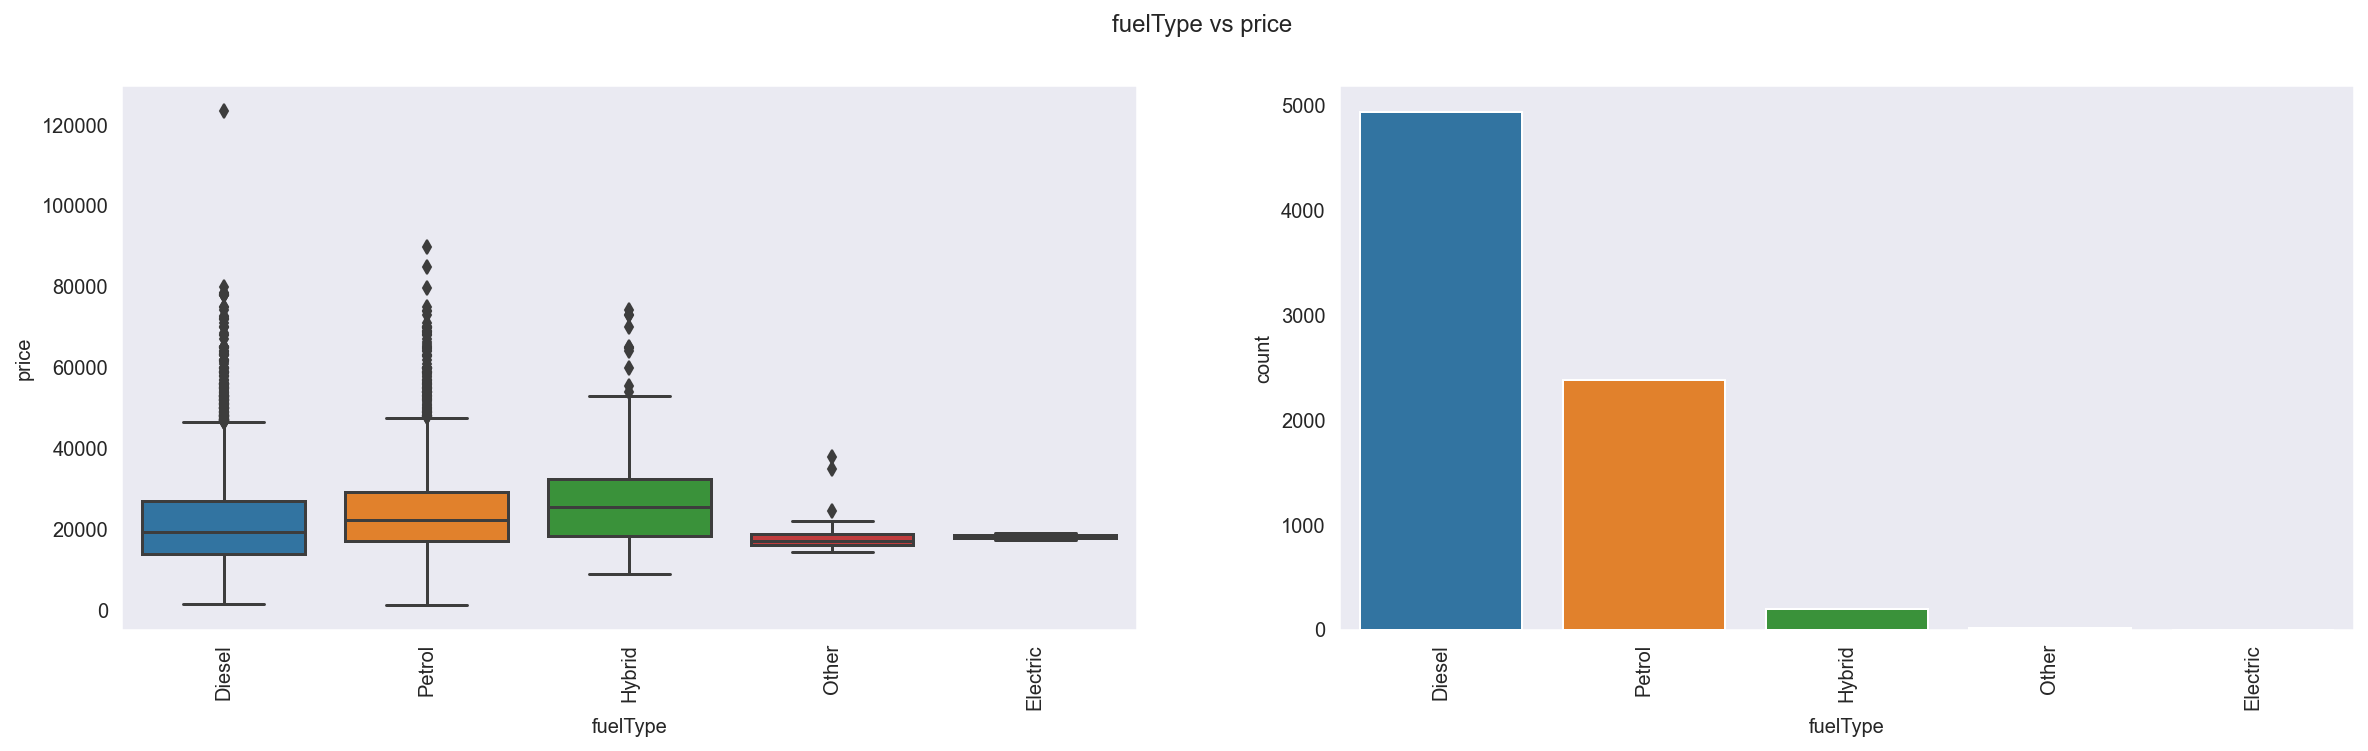

In [161]:
for col in cat_col:
    plot_(train, col)

- Transmisi manual memiliki harga yang lebih murah dibanding yang lainnya.
- Harga Diesel memiliki harga yang lebih murah dibanding yang lainnya

## Removing Outlier

Dari analisa data yang didapatkan, outlier terdapat pada jenis yang memiliki harga diatas 100000. maka dari itu data yang memiliki harga diatas 100000 akan di drop

In [162]:
train = train.drop(train.price[train.price >= 100000].index)

# Clustering

Kluster digunakan untuk pengelompokan beberapa mobil yang serupa berdasarkan karakteristik mobil yang tersedia. ini digunakan untuk mempermudah customer memilih mobil yang tersedia.

## Clustering with K-Means

Klustering menggunakan K-Means bertujuan untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K. Variabel K sendiri adalah jumlah cluster yang kita inginkan

In [163]:
from sklearn.cluster import KMeans
clustered_cols = ['mileage', 'tax', 'mpg', 'year', 'engineSize', 'price']
bmw_clustered = train[clustered_cols].copy()
bmw_clustered_prep = RobustScaler().fit_transform(bmw_clustered)

kolom yang dimasukan kedalam cluster adalah kolom yang memiliki numerical feature yang memiliki nilai korelasi yang tinggidan tentunya di standariasi dahulu sebelum dilakukannya clustering supaya menghindari penyimpangan dalam merepresentasikan hasil pengukuran

In [164]:
from sklearn.metrics import silhouette_score

n_clusters = range(2,9)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k).fit(bmw_clustered_prep)
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': silhouette_score(bmw_clustered_prep, kmeans.labels_)
    }, ignore_index=True)
    
df_results

,k,inertia,score
0,2.0,140687.768080,0.754100
1,3.0,72387.851216,0.778391
2,4.0,47162.128783,0.739594
3,5.0,35249.280015,0.746751
4,6.0,26872.725511,0.689827
5,7.0,21676.748261,0.419300
6,8.0,18812.143330,0.455095


fit model dengan mencari n cluster terbaik agar pembagian clusternya lebih optimal. jumlah cluster yang diambil dalam rentang 2-9. Hasilnya berupa inertia

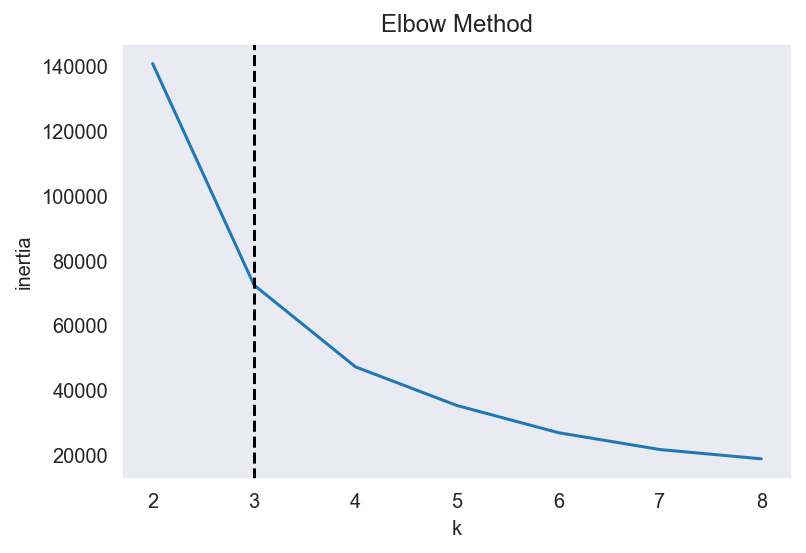

In [165]:
sns.lineplot(x='k',y='inertia',data=df_results)
plt.title('Elbow Method')
plt.axvline(x=3, c='k', linestyle='dashed')
plt.show()

Elbow Method adalah metode empiris untuk mencari jumlah cluster optimal untuk suatu dataset. Pilih nilai k, dimana jarak inertia turun signifikan

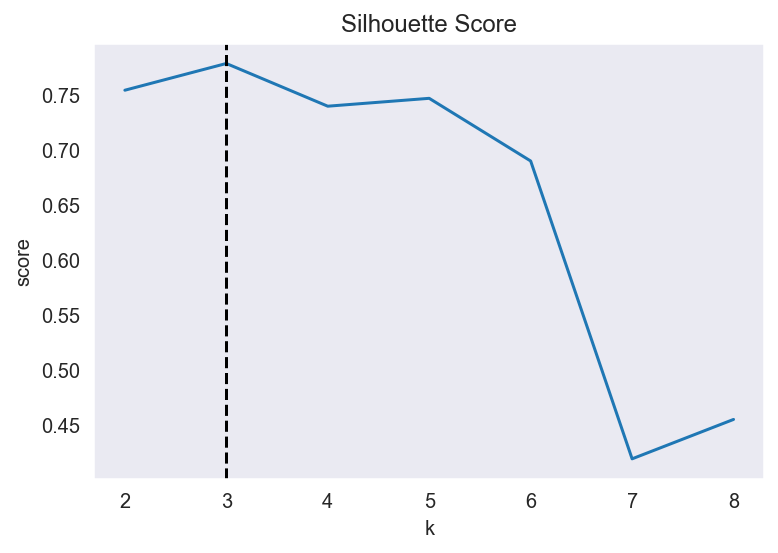

In [166]:
# silhouette score
sns.lineplot(x='k', y='score', data=df_results)
plt.title('Silhouette Score')
plt.axvline(x=3, c='k', linestyle='dashed')

Metode silhouette_score juga merupakan metode untuk mencari jumlah cluster yang optimal dan interpretasi serta validasi konsistensi dalam cluster data

dari dua grafik diatas dapat disimpulkan bahwa:
- Grafik Elbow Method menunjukan bahwa k=4 adalah k optimal dalam pemilihan k dimana nilai tersebut didapatkan pada jarak inertia yang turun secara signifikan pada saat nilai k=4
- Grafik Silhouette Score bahwa k=4 adalah k optimal dalam pemilihan k dimana didapatkan score yang baik saat k=3

K=3

In [167]:
best_kmeans = KMeans(n_clusters=3).fit(bmw_clustered_prep)
bmw_clustered['cluster_ix'] = best_kmeans.labels_.reshape(-1, 1)
bmw_clustered.head()

,mileage,tax,mpg,year,engineSize,price,cluster_ix
4613,1501,145,49.6,2020,2.0,29995,0
8893,23608,150,48.7,2017,2.0,13999,0
5813,4230,145,60.1,2019,2.0,25916,0
3641,41695,30,62.8,2016,2.0,14595,1
9728,72442,200,47.1,2014,3.0,20995,0


best K diterapkan untuk melakukan clustering menggunakan KMeans

In [168]:
for i in range(0, 4):
    display(bmw_clustered[bmw_clustered['cluster_ix'] == i].describe().transpose().iloc[:-1, :])

,count,mean,std,min,25%,50%,75%,max
mileage,6041.0,19967.078298,22335.086259,1.0,4187.0,10834.0,29435.0,178987.0
tax,6041.0,147.497103,14.764185,110.0,145.0,145.0,150.0,205.0
mpg,6041.0,52.565684,21.851893,5.5,44.8,51.4,57.6,470.8
year,6041.0,2017.618441,2.020323,2004.0,2017.0,2018.0,2019.0,2020.0
engineSize,6041.0,2.196309,0.539366,0.0,2.0,2.0,3.0,6.6
price,6041.0,24994.610660,11321.299835,1445.0,17500.0,22890.0,29888.0,89900.0


,count,mean,std,min,25%,50%,75%,max
mileage,1250.0,45428.06240,22353.381876,10.0,29473.75,40773.0,58913.5,133670.0
tax,1250.0,21.67200,11.261700,0.0,20.00,30.0,30.0,30.0
mpg,1250.0,75.99776,45.329988,53.3,62.80,65.7,70.6,470.8
year,1250.0,2015.50240,1.209282,2008.0,2015.00,2016.0,2016.0,2017.0
engineSize,1250.0,1.86128,0.284516,0.0,2.00,2.0,2.0,2.0
price,1250.0,13150.43600,3965.324243,2995.0,10756.25,12900.0,14991.0,48998.0


,count,mean,std,min,25%,50%,75%,max
mileage,254.0,50485.728346,31004.392696,8814.0,26384.00,40526.0,68612.75,214000.0
tax,254.0,313.090551,99.649562,235.0,260.00,300.0,315.00,580.0
mpg,254.0,34.987795,4.961971,19.1,33.20,36.0,37.70,44.8
year,254.0,2012.389764,4.638051,1996.0,2010.00,2014.0,2016.00,2017.0
engineSize,254.0,3.059055,0.602807,0.0,3.00,3.0,3.00,5.0
price,254.0,18230.066929,9747.709414,1200.0,11579.75,17490.5,23467.50,41211.0


,count,mean,std,min,25%,50%,75%,max
mileage,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tax,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mpg,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engineSize,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


menampilkan statistik descriptive untuk ketiga cluster

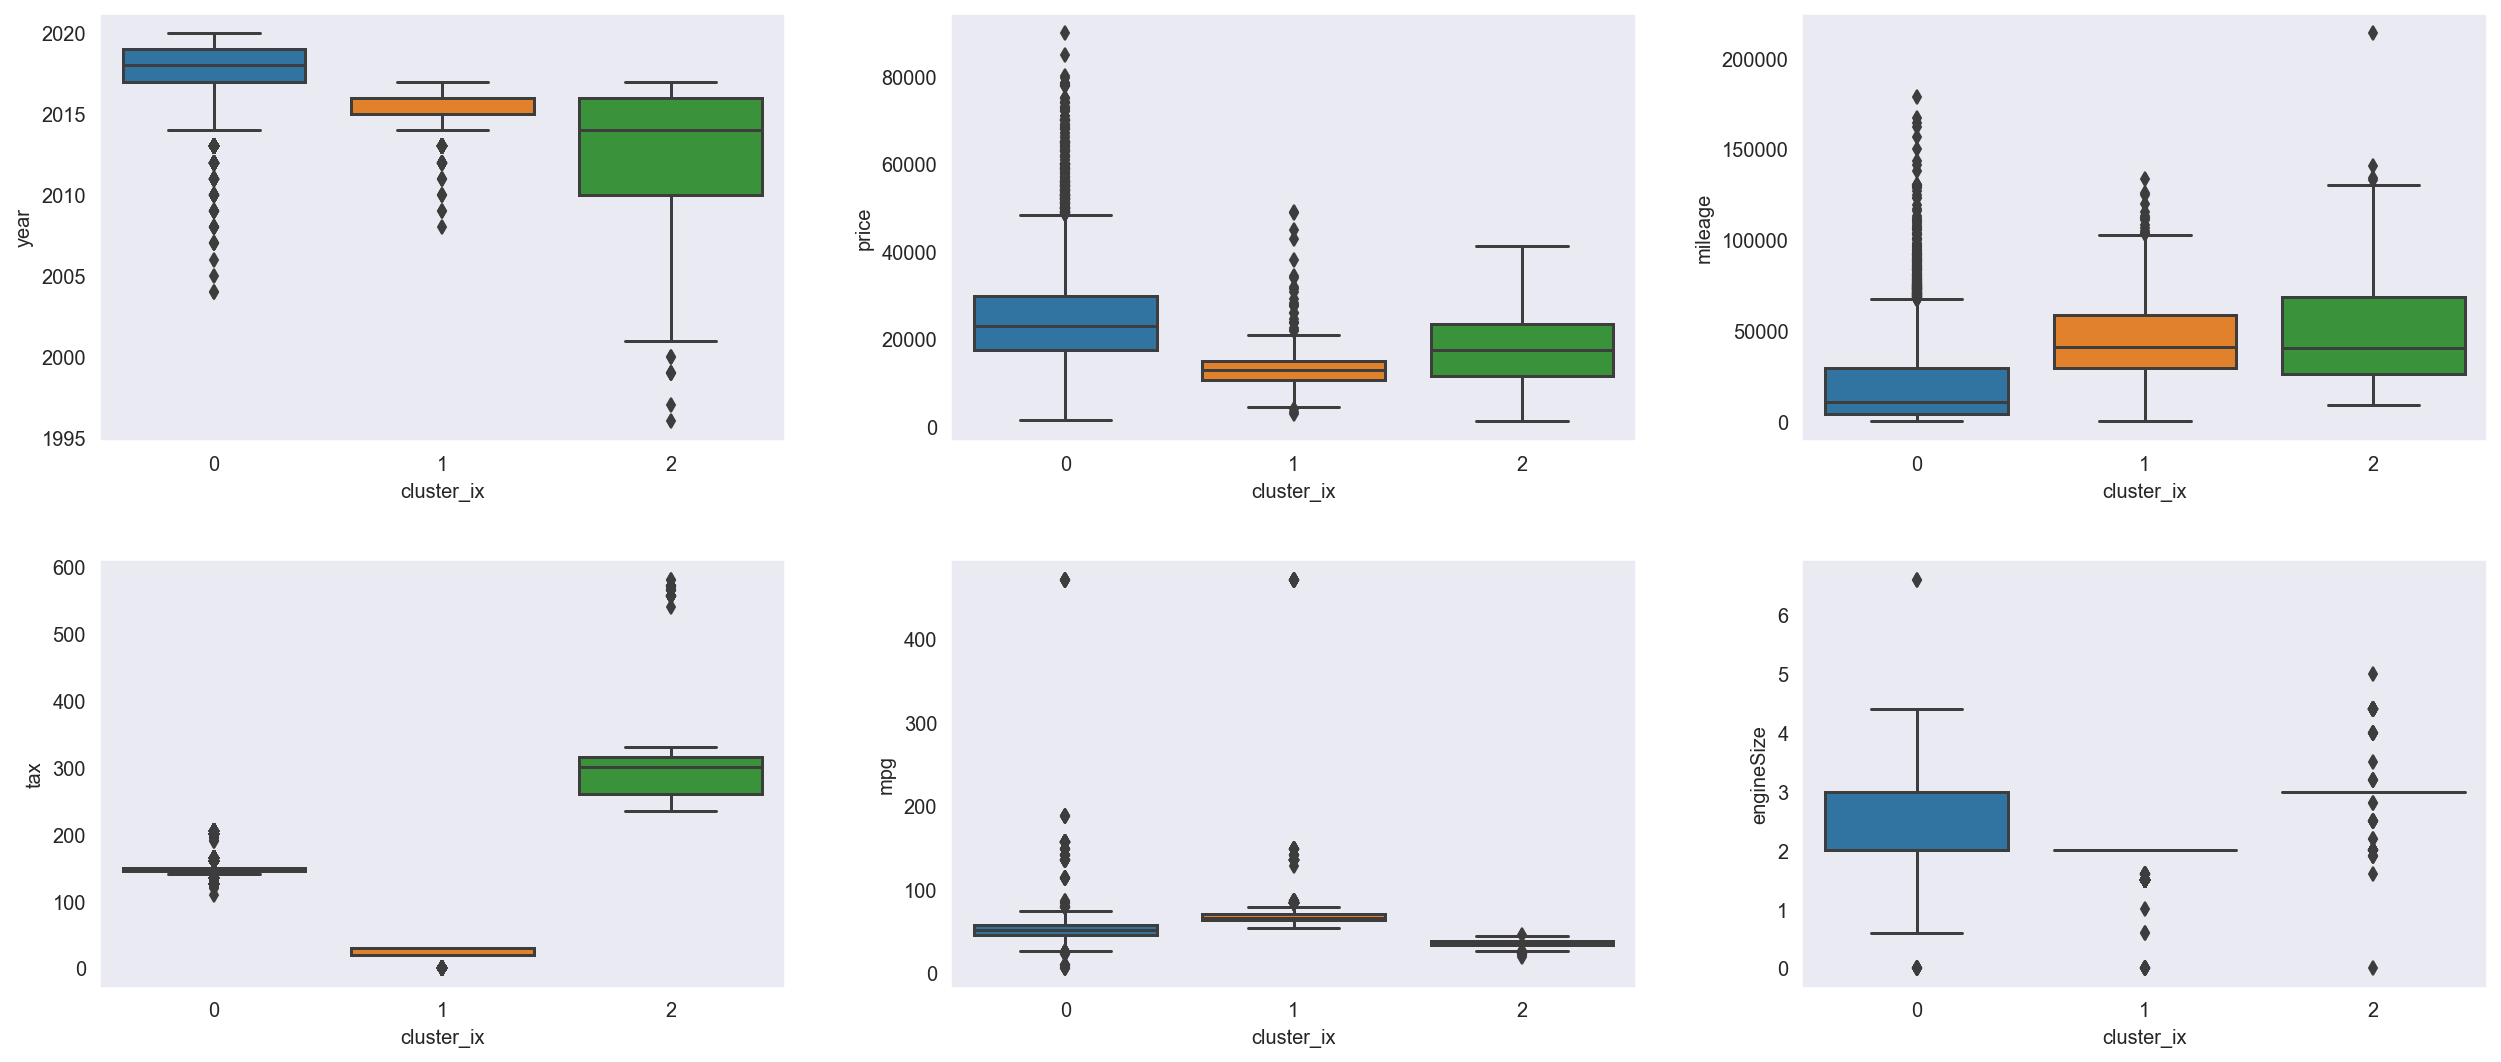

In [171]:
# Visualisasi boxplot untuk masing-masing cluster mobil bmw
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

for feature, ax in zip(num_col, axes.flatten()):
    sns.boxplot(ax=ax, data=bmw_clustered, x='cluster_ix', y=feature)
plt.tight_layout(pad=3)

### Cluster 0 (Cluster BMW Tipe Keluaran Terbaru)
Cluster 0 merupakan kumpulan mobil mayoritas keluaran tahun 2017-2019. Terdapat 6906 mobil yang menjadi anggota Cluster 0. Sebanyak 75% kumpulan mobil ini masih memiliki jarak tempuh penggunaan yang relatif rendah, yaitu di bawah 30.000 km. Biaya pajaknya tidak terlalu mahal ataupun murah, masih dalam rentang \$120 hingga \$205. Efisiensi penggunaan bahan bakar dari kumpulan mobil ini cukup baik dengan rata-rata sebesar 52,79 mpg. Ukuran mesin yang digunakan mayoritas berukuran 2 hingga 3. Jika dilihat dari segi biaya, kumpulan mobil memiliki rata-rata harga tertinggi, yaitu sebesar \$25.000.

### Cluster 1 (Cluster BMW Irit)
Cluster 1 merupakan kumpulan mobil mayoritas keluaran 2015-2016. Terdapat 1438 mobil yang menjadi anggota Cluster 1. Jarak tempuh penggunaan relatif lebih besar dibandingkan dengan Cluster 0 karena memang mobil sudah digunakan terlebih dahulu. Sebanyak 75% jarak tempuh mobil dalam rentang 30.000 km hingga 60.000 km. Biaya pajaknya sangat rendah, dimulai dari \$0 hingga \$30. Selain itu, kumpulan mobil ini punya rata-rata efisiensi penggunaan bahan bakar tertinggi, yaitu sebesar 77,03 mpg. Ukuran mesin yang digunakan berukuran di bawah 2. Sama halnya dengan pajak, kumpulan mobil ini punya harga jual yang paling rendah dibandingkan cluster lainnnya. Rata-rata harga jual mobil sebesar \$13.000.

### Cluster 2 (Cluster BMW Tipe Keluaran Lama)
Cluster 2 merupakan kumpulan mobil mayoritas keluaran 2010-2016 dan sekitar 25% keluaran tahun dibawah 2010 (paling lama tahun 1996). Jarak tempuh penggunaannya tidak berbeda jauh dengan Cluster 1, yaitu dalam rentang 30.000 km hingga 60.000 km. Dibandingkan kedua cluster sebelumnya, biaya pajak kumpulan mobil ini paling besar, yaitu berada dalam rentang \$235 hingga \$580. Kumpulan mobil ini punya efisiensi penggunaan bahan bakar yang paling buruk (teknologi mesin lama), yaitu 35,08 mpg. Ukuran mesin yang digunakan sangat bervariasi dari ukuran 0 hingga 5. Rata-rata harga jual kumpulan mobil ini tidak setinggi Cluster 0, tetapi tidak serendah Cluster 1, yaitu sebesar \$18.500.

# Prediction Modeling
Preprocessing data dilakukan dengan menggunakan fungsi berikut:
- **RobustScaler**: standarisasi data numerik agar skala yang sama. Digunakan RobustScaler karena data distribusinya skewed dan punya banyak outlier
- **OrdinalScaler**: membuat fitur year dan engineSize ke dalam bentuk ordinal
- **OneHotEncoder**: membuat fitur kategori menjadi numerik
- **PolynomialFeatures**: menghasilkan fitur baru yang merupakan hasil kuadrat dari setiap fitur beserta dengan interaksi antar fitur

Seluruh fitur digunakan dalam prediksi harga mobil bmw bekas karena masing-masing memiliki pengaruh yang cukup besar terhadap target variabel (price). Untuk fitur numerik atau ordinal dapat dilihat dari nilai korelasi pada tahap EDA, sedangka untuk fitur kategori dapat dilihat dari mayoritas nilai p-value hasil ANOVA (f_classif) yang di bawah confidence level (type I error) 

In [173]:
X_train = train.drop(columns = 'price')
y_train = train.price

X_test = test.drop(columns = 'price')
y_test = test.price

from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

scaled_cols = ['mileage', 'tax', 'mpg']
ordinal_cols = ['year', 'engineSize']
onehot_cols = ['model', 'transmission', 'fuelType']

scaler = RobustScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder(handle_unknown='ignore')

transformer = ColumnTransformer([
    ('scaler', scaler, scaled_cols),
    ('ordinal', ordinal_encoder, ordinal_cols),
    ('onehot', onehot_encoder, onehot_cols),
])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_pipeline = Pipeline([
    ('transformer', transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('linearregression', LinearRegression(n_jobs=-1))
])

param_grid = {
    'linearregression__fit_intercept': [True, False]
} 
grid = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f'Best parameters    : {best_model.named_steps["linearregression"]}')
print(f'Best CV RMSE score : {np.sqrt(-grid.best_score_)}')
print(f'Test RMSE score    : {np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))}')

In [174]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_pipeline = Pipeline([
    ('transformer', transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('linearregression', LinearRegression(n_jobs=-1))
])

param_grid = {
    'linearregression__fit_intercept': [True, False]
} 
grid = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f'Best parameters    : {best_model.named_steps["linearregression"]}')
print(f'Best CV RMSE score : {np.sqrt(-grid.best_score_)}')
print(f'Test RMSE score    : {np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))}')

Best parameters    : LinearRegression(fit_intercept=False, n_jobs=-1)
Best CV RMSE score : 2919.7979454340507
Test RMSE score    : 17696.155620750975


Untuk kasus prediksi harga mobil bmw digunakan supervised machine learning sederhana (**Linear Regression**) untuk mengetahui performansi benchmarknya. Dilakukan cross validation dengan hyperparameter tuning untuk `fit_intercept`. Berdasarkan hasil evaluasi terhadap metrics `root mean squared error` atau RMSE, model terbaik adalah Linear Regression dengan nilai `fit_intercept=False` dengan nilai 3100,94. Jika model ini digunakan untuk memprediksi test set, nilai RMSE yang dihasilkan sebesar 3782,54.

In [175]:
from sklearn.linear_model import Lasso

model_pipeline = Pipeline([
    ('transformer', transformer),
    ('poly', PolynomialFeatures(degree=2)),
    ('lasso', Lasso(max_iter=5000, tol=0.03))
])

param_grid = {
    'lasso__alpha': [0.1, 1, 10],
    'lasso__fit_intercept': [True, False],
} 
grid = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print(f'Best parameters    : {grid.best_estimator_.named_steps["lasso"]}')
print(f'Best CV RMSE score : {np.sqrt(-grid.best_score_)}')
print(f'Test RMSE score    : {np.sqrt(mean_squared_error(y_test, best_model.predict(X_test)))}')

Best parameters    : Lasso(alpha=1, max_iter=5000, tol=0.03)
Best CV RMSE score : 2845.8525037214417
Test RMSE score    : 6895.144472091212


Model kedua yang digunakan adalah Lasso Regression. Model ini memberikan nilai koefisien 0 terhadap fitur yang tidak memberikan pengaruh signifikan terhadap target variabel. Hasil cross validation dengan model Lasso Regresssion memberikan nilai RMSE yang lebih baik daripada model Linear Regression, yaitu 2830.75. Model ini juga memberikan sedikit peningkatan saat digunakan untuk memprediksi test set dengan nilai RSME sebesar 3745.15.

In [176]:
onehot_encoded_cols = best_model.named_steps['transformer'].named_transformers_['onehot'].get_feature_names()
onehot_encoded_cols = [col[3:] for col in onehot_encoded_cols]
dict_values = scaled_cols + ordinal_cols + onehot_encoded_cols
dict_keys = [f'x{i}' for i in range(len(dict_values))]
dict_features = dict(zip(dict_keys, dict_values))
dict_features

{'x0': 'mileage',
 'x1': 'tax',
 'x2': 'mpg',
 'x3': 'year',
 'x4': 'engineSize',
 'x5': '1 Series',
 'x6': '2 Series',
 'x7': '3 Series',
 'x8': '4 Series',
 'x9': '5 Series',
 'x10': '6 Series',
 'x11': '7 Series',
 'x12': '8 Series',
 'x13': 'M2',
 'x14': 'M3',
 'x15': 'M4',
 'x16': 'M5',
 'x17': 'M6',
 'x18': 'X1',
 'x19': 'X2',
 'x20': 'X3',
 'x21': 'X4',
 'x22': 'X5',
 'x23': 'X6',
 'x24': 'X7',
 'x25': 'Z3',
 'x26': 'Z4',
 'x27': 'i3',
 'x28': 'i8',
 'x29': 'Automatic',
 'x30': 'Manual',
 'x31': 'Semi-Auto',
 'x32': 'Diesel',
 'x33': 'Electric',
 'x34': 'Hybrid',
 'x35': 'Other',
 'x36': 'Petrol'}

In [177]:
coefficients = np.abs(best_model.named_steps['lasso'].coef_)
feature_names = best_model.named_steps['poly'].get_feature_names()

feature_coef = pd.DataFrame({'feature_names': feature_names, 'coefficients': coefficients})
feature_coef = feature_coef[feature_coef['coefficients'] != 0].sort_values(by='coefficients', ascending=False)
feature_coef[:10]

,feature_names,coefficients
25,x24,16105.909254
273,x6 x34,13944.643595
132,x2 x23,10222.493650
35,x34,6870.118838
385,x10 x32,6475.049873
137,x2 x28,6460.728863
125,x2 x16,6387.271954
121,x2 x12,6234.318649
274,x6 x35,6185.861706
131,x2 x22,5880.007756


Jika dilihat dari nilai coefficient model Lasso Regression, mayoritas variabel independen yang memberikan pengaruh signfikan terhadap variabel dependen (price) adalah interaksi antar fitur. Dari 10 fitur dengan nilai koefisien tertinggi, interaksi antara suatu fitur dengan mpg muncul sebanyak 6 kali. Hal ini menunjukkan bahwa fitur interaksi mpg dengan fitur lain memiiki pern penting dalam prediksi harga jual mobil bmw di Inggris.